In [1]:
from random import *
import math
import argparse

from PIL import Image, ImageDraw, ImageOps

from tools.filters import *
from tools.strokesort import *
import tools.perlin
from tools.util import *
from tools.colorchannels import image_to_cmyk_parts

import matplotlib.pyplot as plt
import numpy as np
import cv2

import linedraw

In [2]:
def display_cmyk_grid(c, m, y, k):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle('CMYK Channels', fontsize=14)

    images = [c, m, y, k]
    titles = ['Cyan Channel', 'Magenta Channel', 'Yellow Channel', 'Black Channel']

    for ax, img, title in zip(axes.flatten(), images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 1]) 
    plt.show()

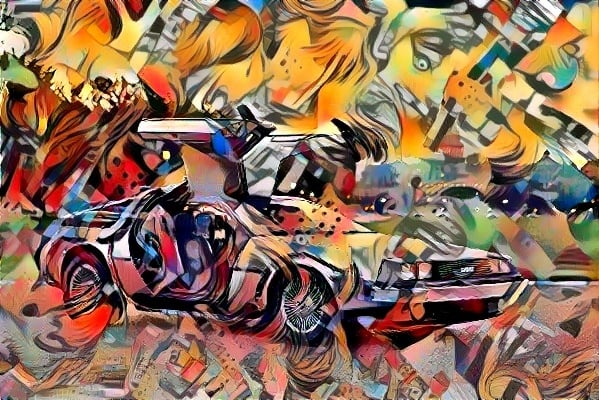

In [3]:
path = "images/dl1.jpeg"
image = Image.open(path).convert("RGB")
image

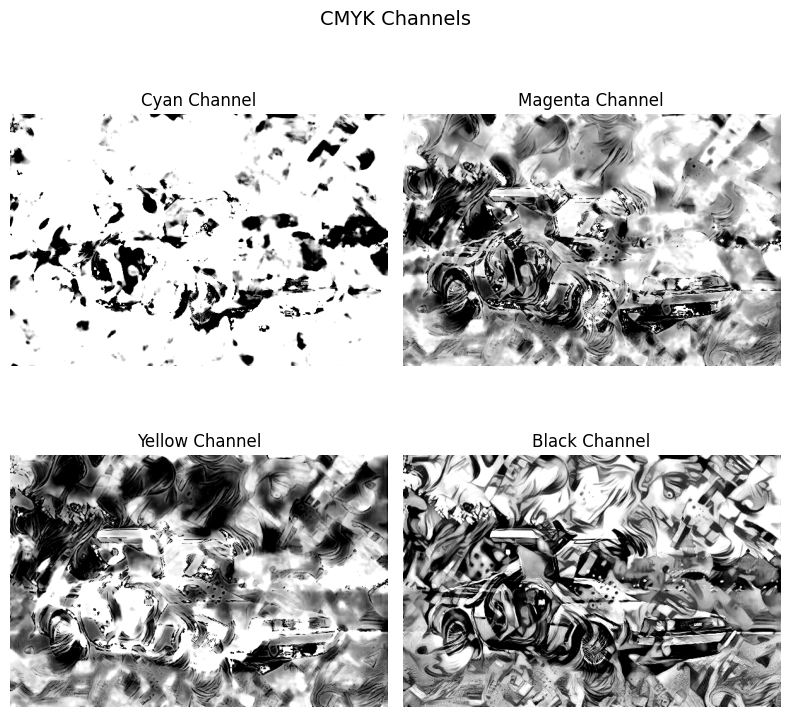

In [4]:
c, m, y, k = image_to_cmyk_parts(image)
contrast = 10
c, m, y, k = [ImageOps.autocontrast(im, contrast) for im in (c, m, y, k)]
display_cmyk_grid(c, m, y, k)